### Things that need to be done
 
* Create the a test database that has:
  * base_data
  * accel_data
  
* Add on the following tables
  * bearing_capacity
  
* Add on the followinig tables
  * bluedrop config
  * bluedrop calibration data

* Trim the top of the bearing data plot (doesn't make a lot of sense but sure)
* 
### Options for formattig data
* Use a JSON for a quickoverview of the survey metadata
* Use a csv format to store information about each of the drops

In [163]:
# Library installs
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt


In [164]:
# Local loads
from lib.data_classes.pffpFolder import pffpDataFolder
from lib.signal_processing.signal_function import moving_average, find_deriv_change, find_drops
from lib.general_functions.global_constants import GRAVITY_CONST
from lib.general_functions.general_function import convert_time_units


In [165]:
# Data folder
folder_dir = r"C:\Geotech_Research\Field_Analysis\BlueDrop_Analysis_Lib\stark_drops"

# PFFP sensor data
calibration_dir = r"calibration_factors\BlueDrop_Calibration_Factors.xlsx"

# PFFP tip information
tip_dir = r"C:\Geotech_Research\Field_Analysis\BlueDrop_Analysis_Lib\calibration_factors\BluedDrop_Cone_Values.xlsx"


In [166]:
# TODO: Combine the pffp_id and the read_calibration_excel_sheet just have the objet call inside
name = "foo"
id = 9
test_folder = pffpDataFolder(folder_dir, pffp_id = id, calibration_factor_dir=calibration_dir, survey_name = name)

# Read the calibration data
test_folder.read_calibration_excel_sheet()
test_folder.calibration_excel_sheet

# Select the specific calibration params
if id == 3:
    test_folder.get_sensor_calibration_params("Sequim_2021")
elif id == 1:
    test_folder.get_sensor_calibration_params("March_2023")
elif id ==9:
    test_folder.get_sensor_calibration_params("October_2023")
else:
    raise ValueError("not a valid pffp id")

In [167]:
# Init a pffpFile instances for each binary file and store the results in the folder
test_folder.store_pffp_files(recursive = False)

print(test_folder) # Information about the folder

Folder: C:\Geotech_Research\Field_Analysis\BlueDrop_Analysis_Lib\stark_drops 
Date range: Not set 
PFFP id: 9                 
Calibration Param dir: calibration_factors\BlueDrop_Calibration_Factors.xlsx 
Num .bin files: 1                 
Num files with drops: Not Set


In [168]:
# Analyze the selected pffp files
test_folder.analyze_all_files(store_df=True, use_pore_pressure=True, 
                              select_accel=["2g_accel", "50g_accel", "250g_accel"],
                              debug = False)
print(test_folder)

test_folder.process_drop_files()

# Store the first drop file
file = test_folder.pffp_drop_files[0]
drop = file.drops[0]

pffp_id = test_folder.pffp_id
drop.get_pffp_tip_values(pffp_id=pffp_id, tip_type="cone", date_string = "April_2024", file_dir = tip_dir)

drop.water_drop = 1
drop.convert_tip_vals()



Folder 'C:\Geotech_Research\Field_Analysis\BlueDrop_Analysis_Lib\stark_drops\no_drop_folder' already exists.
Folder 'C:\Geotech_Research\Field_Analysis\BlueDrop_Analysis_Lib\stark_drops\funky' already exists.

Progress finding files with drops...
[==================================================] 100.00% ETA (min): 0.0
Initial analysis complete!
Folder: C:\Geotech_Research\Field_Analysis\BlueDrop_Analysis_Lib\stark_drops 
Date range: Not set 
PFFP id: 9                 
Calibration Param dir: calibration_factors\BlueDrop_Calibration_Factors.xlsx 
Num .bin files: 1                 
Num files with drops: 1

Progress processing drops in files...
[==================================================] 100.00% ETA (min): 1.7e-08<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>


In [169]:
accel = file.concat_accel
time = file.df["Time"] * 60
pressure = file.df["pore_pressure"]

In [170]:
drop.quick_view_impulse()

KeyError: -17

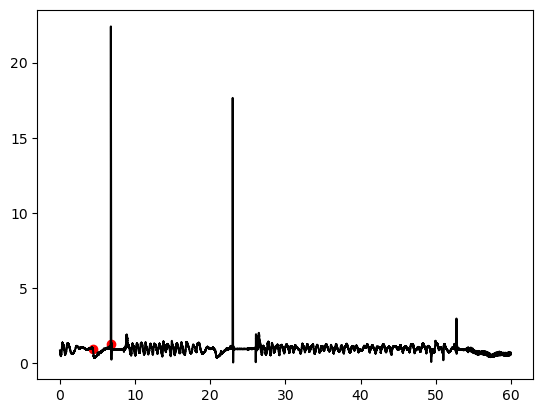

In [171]:
zoom = True

fig, ax1 = plt.subplots()
color_1 = "black"
ax1.plot(time, accel, color = color_1, label = "Acceleration")

ax1.scatter(time[release],accel[release], color = "red", label = "Auto selected points")
ax1.scatter(time[start],accel[start], color = "red" )
ax1.scatter(time[end],accel[end], color = "red" )

# Format the plot
ax1.set_xlabel("time (s)")

if zoom:
    ax1.set_xlim([time[release]-delta, time[end] + delta])

ax1.set_ylabel("Acceleration (g)", color = color_1)
ax1.legend()

# Pressure
ax2 = ax1.twinx()
release = drop.drop_indices["release_index"]
start = drop.drop_indices["start_impulse_index"]
end =  drop.drop_indices["end_impulse_index"]

color_2 = "blue"
ax2.set_ylabel("Pressure (kPa)", color = color_2)
ax2.plot(time, pressure, color =color_2, label = "Pressure")
ax2.tick_params(axis='y', labelcolor=color_2)

delta = 0.1
if zoom:
    ax2.legend(loc = (0.0125, 0.8))
else:
    ax2.legend(loc = (0.61, 0.8))

fig.tight_layout()
if zoom:
    fig.savefig('close_view.png', dpi=300)
else:
    fig.savefig('wid_view.png', dpi=300)
plt.show()


In [172]:
display(drop.bearing_dfs["mantle"])

None

In [173]:
qsbc_vals = [0.2, 0.5, 0.9, 1.2, 1.5]

for name in ["mantle", "projected"]:
    drop.calc_drop_contact_area(area_type = name)
    drop.calc_drop_dynamic_bearing(area_type = name)
    for val in qsbc_vals:
        drop.calc_drop_qs_bearing(k_factor = val, area_type = name)
        drop.calc_drop_qs_bearing(k_factor = val, area_type = name)

c:\Geotech_Research\Field_Analysis\BlueDrop_Analysis_Lib\lib\mechanics_functions\bearing_capacity_funcs.py:121: RuntimeWarning:

invalid value encountered in log10

c:\Geotech_Research\Field_Analysis\BlueDrop_Analysis_Lib\lib\mechanics_functions\bearing_capacity_funcs.py:121: RuntimeWarning:

invalid value encountered in log10

c:\Geotech_Research\Field_Analysis\BlueDrop_Analysis_Lib\lib\mechanics_functions\bearing_capacity_funcs.py:121: RuntimeWarning:

invalid value encountered in log10

c:\Geotech_Research\Field_Analysis\BlueDrop_Analysis_Lib\lib\mechanics_functions\bearing_capacity_funcs.py:121: RuntimeWarning:

invalid value encountered in log10

c:\Geotech_Research\Field_Analysis\BlueDrop_Analysis_Lib\lib\mechanics_functions\bearing_capacity_funcs.py:121: RuntimeWarning:

invalid value encountered in log10

c:\Geotech_Research\Field_Analysis\BlueDrop_Analysis_Lib\lib\mechanics_functions\bearing_capacity_funcs.py:121: RuntimeWarning:

invalid value encountered in log10

c:\Geotech

In [ ]:
drop.bearing_dfs["projected"]

,contact_area_projected,qDyn_projected,qsbc_proj_0.4,qsbc_proj_0.3,qsbc_proj_0.1,qsbc_proj_0.6,qsbc_proj_0.9,qsbc_proj_1.2,qsbc_proj_1.5,qsbc_proj_0.45,qsbc_proj_0.2,qsbc_proj_0.5
0,0.006013,17607.586518,8913.525242,10168.779504,14155.776378,7148.640569,5511.668757,4484.711727,3780.342586,8395.355589,11835.526979,7934.121576
1,0.006013,18360.472554,9294.890741,10603.813147,14761.211121,7454.532931,5747.541459,4676.649343,3942.142384,8754.564117,12341.807593,8273.606361
2,0.006013,19777.290660,10012.446437,11422.366989,15900.474500,8030.063660,6191.317937,5037.758380,4246.546501,9430.423964,13294.448538,8912.349983
3,0.006013,21801.045018,11037.410604,12591.594337,17527.789224,8852.161464,6825.218323,5553.576036,4681.366118,10395.830581,14655.201099,9824.740369
4,0.006013,24337.916672,12322.374744,14057.396235,19567.782701,9882.818716,7619.948366,6200.271381,5226.516139,11606.136277,16361.077238,10968.586783
...,...,...,...,...,...,...,...,...,...,...,...,...
112,0.006013,16849.876806,16849.876806,16849.876806,16849.876806,16849.876806,16849.876806,16849.876806,16849.876806,16849.876806,16849.876806,16849.876806
113,0.006013,15849.433908,15849.433908,15849.433908,15849.433908,15849.433908,15849.433908,15849.433908,15849.433908,15849.433908,15849.433908,15849.433908
114,0.006013,14913.434090,14913.434090,14913.434090,14913.434090,14913.434090,14913.434090,14913.434090,14913.434090,14913.434090,14913.434090,14913.434090
115,0.006013,14058.434851,14058.434851,14058.434851,14058.434851,14058.434851,14058.434851,14058.434851,14058.434851,14058.434851,14058.434851,14058.434851


KeyError: 'qsbc_proj_0.45'

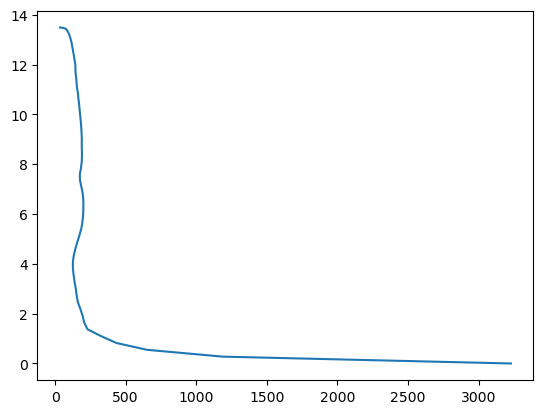

In [174]:
qsbc_vals = [0.2, 0.45, 0.9, 1.2, 1.5]

displacement = drop.impulse_df["displacement"]
df = drop.bearing_dfs["projected"]

end = -17
for val in qsbc_vals:
    column = "qsbc_proj_{}".format(val)
    k_name=  "k = {}".format(val)
    bearing = df[column][:end]
    bearing = bearing/1e3
    plt.plot(bearing, displacement[:end] * 100, label= k_name)

plt.legend()
plt.gca().invert_yaxis()
plt.ylabel("Penetration Depth (cm)")
plt.xlabel("QSBC (kPa)")
plt.show()

In [ ]:
# Make the drop id
drop.make_drop_name()
drop.get_drop_datetime(file)
drop.get_peak_impulse_deceleration()

print(drop.name)

foo_0C25_index_1


In [ ]:
import sqlite3

In [ ]:
from BlueDrop_db_lib.dbClass import PFFPDatabase
 

In [ ]:
# Input fake date information
survey_year = "24"
survey_month = "01"
survey_start_day = "01"

survey_name = test_folder.survey_name
survey_id = "{}_YR{}{}{}".format(survey_name, survey_year, survey_month, survey_start_day)

bluedrop_id = test_folder.pffp_id
pffp_calibration_df = test_folder.calibration_params
pffp_calibration_dict = {"pffp_id":bluedrop_id, "pffp_calibration_df":pffp_calibration_df}

location = "foo_location"
transect = "foo_transect"
latitude = 1.0
longitude = 2.0


In [ ]:
location_dict = {"survey_id":survey_id, "survey_name":survey_name, "location_name":location, "transect":transect, "latitude":latitude, "longitude":longitude}

In [ ]:
database = PFFPDatabase("foo2")
database.create_database()

df = drop.pffp_config["tip_props"]

Database 'foo2' loaded successfully.
Database 'foo2' created successfully.
Database 'foo2' created successfully.


In [ ]:
sub_df =list( df[df['Properties'] != 'radius_coeff']["units"])
display(sub_df)

['kg', 'm', 'm', 'cm', 'm^3']

In [ ]:
database.add_drop_data(drop, pffp_calibration_dict=pffp_calibration_dict, location_dict=location_dict, pffp_config_dict=drop.pffp_config)

Error adding drop data: UNIQUE constraint failed: Drops.drop_name, Drops.survey_id


In [ ]:
test_folder.calibration_params

,Sensor,October_2023_offset,October_2023_scale
0,2g_accel,-17196.9,1626262.4
1,18g_accel,27399.6,159870.4
2,50g_accel,-246643.4,63690.9
3,200g_accel,16353.5,27604.8
4,250g_accel,-8819.9,13630.9
5,55g_x_tilt,-16510.0,65260.8
6,55g_y_tilt,71742.6,65778.7
7,pore_pressure,17912.7,20278.7


In [ ]:
drop.pffp_config

{'tip_type': 'blunt',
 'tip_props':      Properties units  blunt_April_2024
 0     pffp_mass    kg         10.300000
 1    tip_height     m          0.085700
 2   base_radius     m          0.043750
 3    tip_radius    cm          0.000000
 4  radius_coeff     -          0.000000
 5   pffp_volume   m^3          0.002473,
 'tip_col_name': 'blunt_April_2024'}

In [ ]:
display(database.get_table_as_df(name = "drops"))

,drop_id,drop_name,drop_datetime,survey_name,survey_id,analysis_date,water_drop
0,20240501160424128011,foo_0C25_index_1,2024-04-24T20:01:01.810452,foo,foo_YR240101,2024-05-01T16:04:24.128011,1


In [ ]:

display(database.get_table_as_df(name = "accel"))

,drop_id,drop_timestamp,impulse_start_index,impulse_time,impulse_accel,release_start_index,release_time,release_accel,peak_deceleration
0,20240501160424128011,2024-04-24T20:01:01.810452,b'\xc04\x00\x00\x00\x00\x00\x00',b're\xc0\t\x1b\x02\x1b@W\x92v\x1c\x9e\x02\x1b@...,b'$\xfb4\xf7\xc9\xfe\x06@dp*M\xf7\x82\n@hx\xd2...,"b'\x1a""\x00\x00\x00\x00\x00\x00'",b'\xf9\x1bw\x18\xccu\x11@\xdeH-+Ov\x11@\xc4u\x...,b'\x80\xad\xefH.\x14\xde\xbf\x80&\xb8m\x18d\xd...,209.896714


In [ ]:
display(database.get_table_as_df(name = "bearing"))

,drop_id,drop_name,area_type,contact_area_name,contact_area_data,dynamic_name,dynamic_data,qsbc_name_1,qsbc_data_1,qsbc_name_2,qsbc_data_2,qsbc_name_3,qsbc_data_3,qsbc_name_4,qsbc_data_4,qsbc_name_5,qsbc_data_5
0,20240501160424128011,foo_0C25_index_1,projected,contact_area_projected,b'FE\xff\xadI\xe3\xef>\x05\xb1\x90# \xac\x06?\...,qDyn_projected,b'\x07\x11k\r\x9fRRA\xb1\x84>\tM\xf7:Ah\x8f\xd...,qsbc_proj_0.4,b'\xaa\xa9T\x04\x16\x8dBA\xf6\x82\xb2\xa3\x84M...,qsbc_proj_0.3,b'\xbf\xc5\x08;\xe1)EA\xadq\x8cD\xcb%/A\xa5$\x...,None,None,None,None,None,None
1,20240501160424128011,foo_0C25_index_1,mantle,contact_area_mantle,b'GE\xff\xadI\xe3\xef><\xd7J\xd0\x1e3\x0c?\xc1...,qDyn_mantle,b'\x06\x11k\r\x9fRRAs|^r5\xae5Ab\xe4\xb0\xcd\x...,qsbc_mant_0.4,b'\xa9\xa9T\x04\x16\x8dBA\xc2\xf9\x15\xdf\x86\...,qsbc_mant_0.3,"b""\xbe\xc5\x08;\xe1)EA\x82\xc8\xf4\xd2\xe0\n)A...",None,None,None,None,None,None


In [ ]:
df=  database.get_table_as_df(name = "pffp_calib")
display(df)

,drop_id,pffp_id,calib_name,2g_accel_offset,2g_accel_scale,18g_accel_offset,18g_accel_scale,50g_accel_offset,50g_accel_scale,200g_accel_offset,200g_accel_scale,250g_accel_offset,250g_accel_scale,55g_x_tilt_offset,55g_x_tilt_scale,55g_y_tilt_offset,55g_y_tilt_scale,pore_pressure_offset,pore_pressure_scale
0,20240501160424128011,9,October_2023,-17196.9,1626262.4,27399.6,159870.4,-246643.4,63690.9,16353.5,27604.8,-8819.9,13630.9,-16510.0,65260.8,71742.6,65778.7,17912.7,20278.7


In [ ]:
df=  database.get_table_as_df(name = "survey")
display(df)

,drop_id,survey_id,survey_name,location_name,transect,latitude,longitude
0,20240501160424128011,foo_YR240101,foo,foo_location,foo_transect,1.0,2.0


In [ ]:
display(database.get_table_as_df(name = "pffp_config"))

,drop_id,pffp_id,tip_type,pffp_mass_unit,tip_height_unit,base_radius_unit,tip_radius_unit,pffp_volume_unit,pffp_mass,tip_height,base_radius,tip_radius,radius_coeff,pffp_volume,tip_col_name
0,20240501160424128011,cone,kg,m,m,m,-,m^3,7.71,0.0755,0.04375,0.0022,0.0,0.002473,cone_April_2024


In [ ]:
database.close_database()

Database 'foo2' closed successfully.
